In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import cross_val_score
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import KFold, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset

2023-12-04 12:46:30.000812: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Download/Inspect Data

In [2]:
df= pd.read_csv('/Users/noah/Desktop/Group project Datasest.csv')
column_to_move = 'Diagnosis'

df = pd.concat([df.drop(columns=['Diagnosis']), df['Diagnosis']], axis=1)
df

,Mean Velocity No Task (cm/sec),Mean Velocity Alphabet (cm/sec),Mean Cadence Serial Subtraction,Mean Velocity Serial Subtraction (cm/sec),Mean Cadence Texting (steps/min),Mean Velocity Texting (cm/sec),Alphabet % Change in Velocity,Serial subtraction % Change in Velocity,Texting % Change in Velocity,Festination index,...,Ellipse Major Axis (cm.),Ellipse Angle (degrees),Any change in diagnosis due to consensus?,Global Diagnosis,Diagnosis (Sub-Category),"If MCI, please select",Participant Gender,Current Age,Participant's Race,Diagnosis
0,124.822,122.183,104.348,117.467,101.250,98.865,2.114211,5.892391,20.795212,0.014649,...,35.851,-21.928,NaN,1.0,12.0,NaN,1.0,72,1.0,1.0
1,143.825,128.803,112.878,132.167,102.037,107.019,10.444638,8.105684,25.590822,0.013824,...,29.132,9.647,NaN,1.0,11.0,NaN,2.0,69,1.0,1.0
2,151.682,128.702,104.159,115.401,114.741,128.475,15.150117,23.919120,15.299772,0.013107,...,NaN,NaN,NaN,1.0,11.0,NaN,2.0,47,1.0,1.0
3,95.809,107.170,90.282,84.276,92.415,77.149,-11.857967,12.037491,19.476250,0.016576,...,26.146,0.644,NaN,2.0,26.0,NaN,2.0,45,2.0,2.0
4,124.444,118.114,105.014,107.133,80.623,64.906,5.086625,13.910675,47.843207,0.015491,...,NaN,-26.366,1.0,2.0,21.0,21.0,2.0,83,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,126.947,125.248,114.073,119.173,106.031,94.380,1.338354,6.123815,25.654013,0.015185,...,33.024,8.614,NaN,1.0,11.0,NaN,2.0,58,1.0,1.0
150,120.730,106.696,101.857,110.123,96.644,94.848,11.624286,8.785720,21.437919,0.015125,...,NaN,NaN,NaN,1.0,12.0,NaN,2.0,69,1.0,1.0
151,131.731,132.318,107.063,122.046,86.475,67.974,-0.445605,7.352104,48.399390,0.014145,...,30.542,-3.509,NaN,1.0,12.0,NaN,1.0,73,1.0,1.0
152,148.416,144.638,108.108,131.402,95.327,99.662,2.545548,11.463724,32.849558,0.012993,...,34.290,2.086,NaN,1.0,12.0,NaN,2.0,61,1.0,1.0


In [3]:
variables = df.columns

# Display the list of variables
print("List of Variables:")
print(variables)



List of Variables:
Index(['Mean Velocity No Task (cm/sec) ', 'Mean Velocity Alphabet (cm/sec) ',
       'Mean Cadence Serial Subtraction   ',
       'Mean Velocity Serial Subtraction (cm/sec) ',
       'Mean Cadence Texting (steps/min) ', 'Mean Velocity Texting (cm/sec) ',
       'Alphabet % Change in Velocity ',
       'Serial subtraction % Change in Velocity ',
       'Texting % Change in Velocity ', 'Festination index',
       'Alphabet % Change in Cadence ', 'Texting % Change in Cadence',
       'Serial Subtraction % Change in Cadence', 'Mean Cadence No Task',
       'Mean eGVI No Task', 'Mean Cadence Alphabet ', 'Mean eGVI Alphabet ',
       'Mean eGVI Serial Subtraction', 'Mean eGVI Texting ',
       'Mean Step Length No Task  (cm)', 'Mean Step Length Alphabet (cm)',
       'Mean Step Length Serial Subtraction', 'Mean Step Length Texting',
       'Mean Stride Width No Task ', 'Mean Stride Width Alphabet ',
       'Mean Stride Width Serial Subtraction ', 'Mean Stride Width Texting

## Data Cleaning

In [4]:
#Remove all unnecesary columns 
columns_to_drop = ['Global Diagnosis', 'Diagnosis (Sub-Category)','If MCI, please select','Any change in diagnosis due to consensus?']

df2 = df.drop(columns=columns_to_drop)
#Remove all Blank Diagnosis values 
df2.dropna(subset=['Diagnosis'], inplace=True)
df2


,Mean Velocity No Task (cm/sec),Mean Velocity Alphabet (cm/sec),Mean Cadence Serial Subtraction,Mean Velocity Serial Subtraction (cm/sec),Mean Cadence Texting (steps/min),Mean Velocity Texting (cm/sec),Alphabet % Change in Velocity,Serial subtraction % Change in Velocity,Texting % Change in Velocity,Festination index,...,Ellipse Center ML Axis (cm),Ellipse Center AP Axis (cm),Ellipse Area (cm x cm),Ellipse Minor Axis (cm.),Ellipse Major Axis (cm.),Ellipse Angle (degrees),Participant Gender,Current Age,Participant's Race,Diagnosis
0,124.822,122.183,104.348,117.467,101.250,98.865,2.114211,5.892391,20.795212,0.014649,...,-2.804,2.086,572.396,20.328,35.851,-21.928,1.0,72,1.0,1.0
1,143.825,128.803,112.878,132.167,102.037,107.019,10.444638,8.105684,25.590822,0.013824,...,0.384,1.066,344.761,15.068,29.132,9.647,2.0,69,1.0,1.0
2,151.682,128.702,104.159,115.401,114.741,128.475,15.150117,23.919120,15.299772,0.013107,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,47,1.0,1.0
3,95.809,107.170,90.282,84.276,92.415,77.149,-11.857967,12.037491,19.476250,0.016576,...,5.206,-2.835,239.867,11.681,26.146,0.644,2.0,45,2.0,2.0
4,124.444,118.114,105.014,107.133,80.623,64.906,5.086625,13.910675,47.843207,0.015491,...,NaN,NaN,54.223,NaN,NaN,-26.366,2.0,83,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,126.947,125.248,114.073,119.173,106.031,94.380,1.338354,6.123815,25.654013,0.015185,...,1.330,0.711,434.888,16.767,33.024,8.614,2.0,58,1.0,1.0
150,120.730,106.696,101.857,110.123,96.644,94.848,11.624286,8.785720,21.437919,0.015125,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,69,1.0,1.0
151,131.731,132.318,107.063,122.046,86.475,67.974,-0.445605,7.352104,48.399390,0.014145,...,1.381,1.668,379.502,15.821,30.542,-3.509,1.0,73,1.0,1.0
152,148.416,144.638,108.108,131.402,95.327,99.662,2.545548,11.463724,32.849558,0.012993,...,0.421,1.358,534.577,19.850,34.290,2.086,2.0,61,1.0,1.0


In [5]:
column_means = df.mean()

# Impute missing values with the mean of each column

df3 = df2.fillna(column_means)
df3 = df3.replace(to_replace=['10-041'],value='10.041')






/var/folders/yg/gv67zj6s16jgdp3mjl4zzlg00000gn/T/ipykernel_35527/134122020.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  column_means = df.mean()


In [6]:
df3.shape

(145, 94)

In [7]:
pd.set_option('display.max_columns', None)
df3[df3.eq('31"973').any(axis=1)]

,Mean Velocity No Task (cm/sec),Mean Velocity Alphabet (cm/sec),Mean Cadence Serial Subtraction,Mean Velocity Serial Subtraction (cm/sec),Mean Cadence Texting (steps/min),Mean Velocity Texting (cm/sec),Alphabet % Change in Velocity,Serial subtraction % Change in Velocity,Texting % Change in Velocity,Festination index,Alphabet % Change in Cadence,Texting % Change in Cadence,Serial Subtraction % Change in Cadence,Mean Cadence No Task,Mean eGVI No Task,Mean Cadence Alphabet,Mean eGVI Alphabet,Mean eGVI Serial Subtraction,Mean eGVI Texting,Mean Step Length No Task (cm),Mean Step Length Alphabet (cm),Mean Step Length Serial Subtraction,Mean Step Length Texting,Mean Stride Width No Task,Mean Stride Width Alphabet,Mean Stride Width Serial Subtraction,Mean Stride Width Texting,Mean Stance No Task (%),Mean Stance Alphabet,Mean Stance Serial Subtraction,Mean Stance Texting,Mean Swing No Task,Mean Swing Alphabet,Mean Swing Serial Subtraction,Mean Swing Texting,Mean Single Support Normal,Mean Single Support Alphabet,Mean Single Support Serial Subtraction,Mean Single Support Texting,Mean Total Double Support No Task,Mean Total Double Support Serial Subtraction,Mean Total Double Support Alphabet,Mean Total Double Support Texting,Summary Duration (sec.),FSST Forward,FSST Backward,FSST Right,FSST Left,ML Mean Both Feet COP,ML Mean Left Foot COP,ML Mean Right Foot,AP Mean Both Feet COP,AP Mean Left Foot,AP Mean Right Foot,Path Length Both Feet,Path Length Left Foot,Path Length Right,SD of ML Velocity Both Feet,SD of ML Velocity Left Foot,SD of ML Velocity Right Foot,SD of AP Velocity Both Feet,SD of AP Velocity Left Foot,SD of AP Velocity Right Foot,Ellipse Area Both Feet,Ellipse Area Left Foot COP,Ellipse Area Right Foot,Ellipse Angle Both Feet,Ellipse Angle Right Foot,Ellipse Angle Left Foot,Left Foot Duration (sec.),Right Foot Duration (sec.),Changes in Main Support Legacy Duration,Asymmetry L/R of Both Feet COP,ML Mobility (%),ML Mean (cm),ML Range (cm),ML Min. (cm),ML Max. (cm),Asymmetry A/P,AP Mobility (%),AP Mean (cm),AP Range (cm),AP Min. (cm),AP Max. (cm),Ellipse Center ML Axis (cm),Ellipse Center AP Axis (cm),Ellipse Area (cm x cm),Ellipse Minor Axis (cm.),Ellipse Major Axis (cm.),Ellipse Angle (degrees),Participant Gender,Current Age,Participant's Race,Diagnosis
22,142.623,141.183,112.375,138.747,112.281,124.946,1.009655,2.717654,12.394214,0.013205,0.446002,0.6398,0.441023,113.004,103.975,112.5,100.0,97.363,108.06,74.972,75.251,73.953,66.19,15.797,16.607,16.497,18.955,64.812,64.725,64.977,65.98,65.188,35.275,35.023,34.02,35.126,35.588,35.319,34.044,29.599,29.754,29.247,"31""973",13.675,9.446,9.872,9.476,9.324,-1.01,-14.325267,14.342483,0.473,0.06605,0.723117,16.585,25.081917,24.1627,0.554,0.705267,0.67245,0.397,1.764883,1.82725,0.51,6.686267,4.405578,-73.777,76.31885,-67.6007,9.119667,9.714667,16.0,0.944,71.416,-0.344,29.93,-14.537,15.393,2.227,48.215,1.486,14.084,-4.364,9.72,0.639,2.706,343.289,13.9,31.445,7.108,1.0,68,2.0,1.0


In [8]:
df3.columns

Index(['Mean Velocity No Task (cm/sec) ', 'Mean Velocity Alphabet (cm/sec) ',
       'Mean Cadence Serial Subtraction   ',
       'Mean Velocity Serial Subtraction (cm/sec) ',
       'Mean Cadence Texting (steps/min) ', 'Mean Velocity Texting (cm/sec) ',
       'Alphabet % Change in Velocity ',
       'Serial subtraction % Change in Velocity ',
       'Texting % Change in Velocity ', 'Festination index',
       'Alphabet % Change in Cadence ', 'Texting % Change in Cadence',
       'Serial Subtraction % Change in Cadence', 'Mean Cadence No Task',
       'Mean eGVI No Task', 'Mean Cadence Alphabet ', 'Mean eGVI Alphabet ',
       'Mean eGVI Serial Subtraction', 'Mean eGVI Texting ',
       'Mean Step Length No Task  (cm)', 'Mean Step Length Alphabet (cm)',
       'Mean Step Length Serial Subtraction', 'Mean Step Length Texting',
       'Mean Stride Width No Task ', 'Mean Stride Width Alphabet ',
       'Mean Stride Width Serial Subtraction ', 'Mean Stride Width Texting ',
       'Mean St

In [9]:
df3.shape

(145, 94)

In [10]:
mask = df3['Mean Total Double Support Texting '] == '31"973'
df3.loc[mask, 'Mean Total Double Support Texting '] = 31.973

In [11]:
df3 = pd.DataFrame(df3)

In [12]:
df3.shape

(145, 94)

In [13]:
df3 = df3.fillna(df.mean())

/var/folders/yg/gv67zj6s16jgdp3mjl4zzlg00000gn/T/ipykernel_35527/323944862.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df3 = df3.fillna(df.mean())


In [14]:
df3.shape

(145, 94)

In [15]:
df3.isna().sum().value_counts()

0     92
4      1
23     1
dtype: int64

In [16]:
df3.fillna(0, inplace=True)

In [17]:
df3.isna().sum().value_counts()

0    94
dtype: int64

## Random Forest Classifier- finding most import features

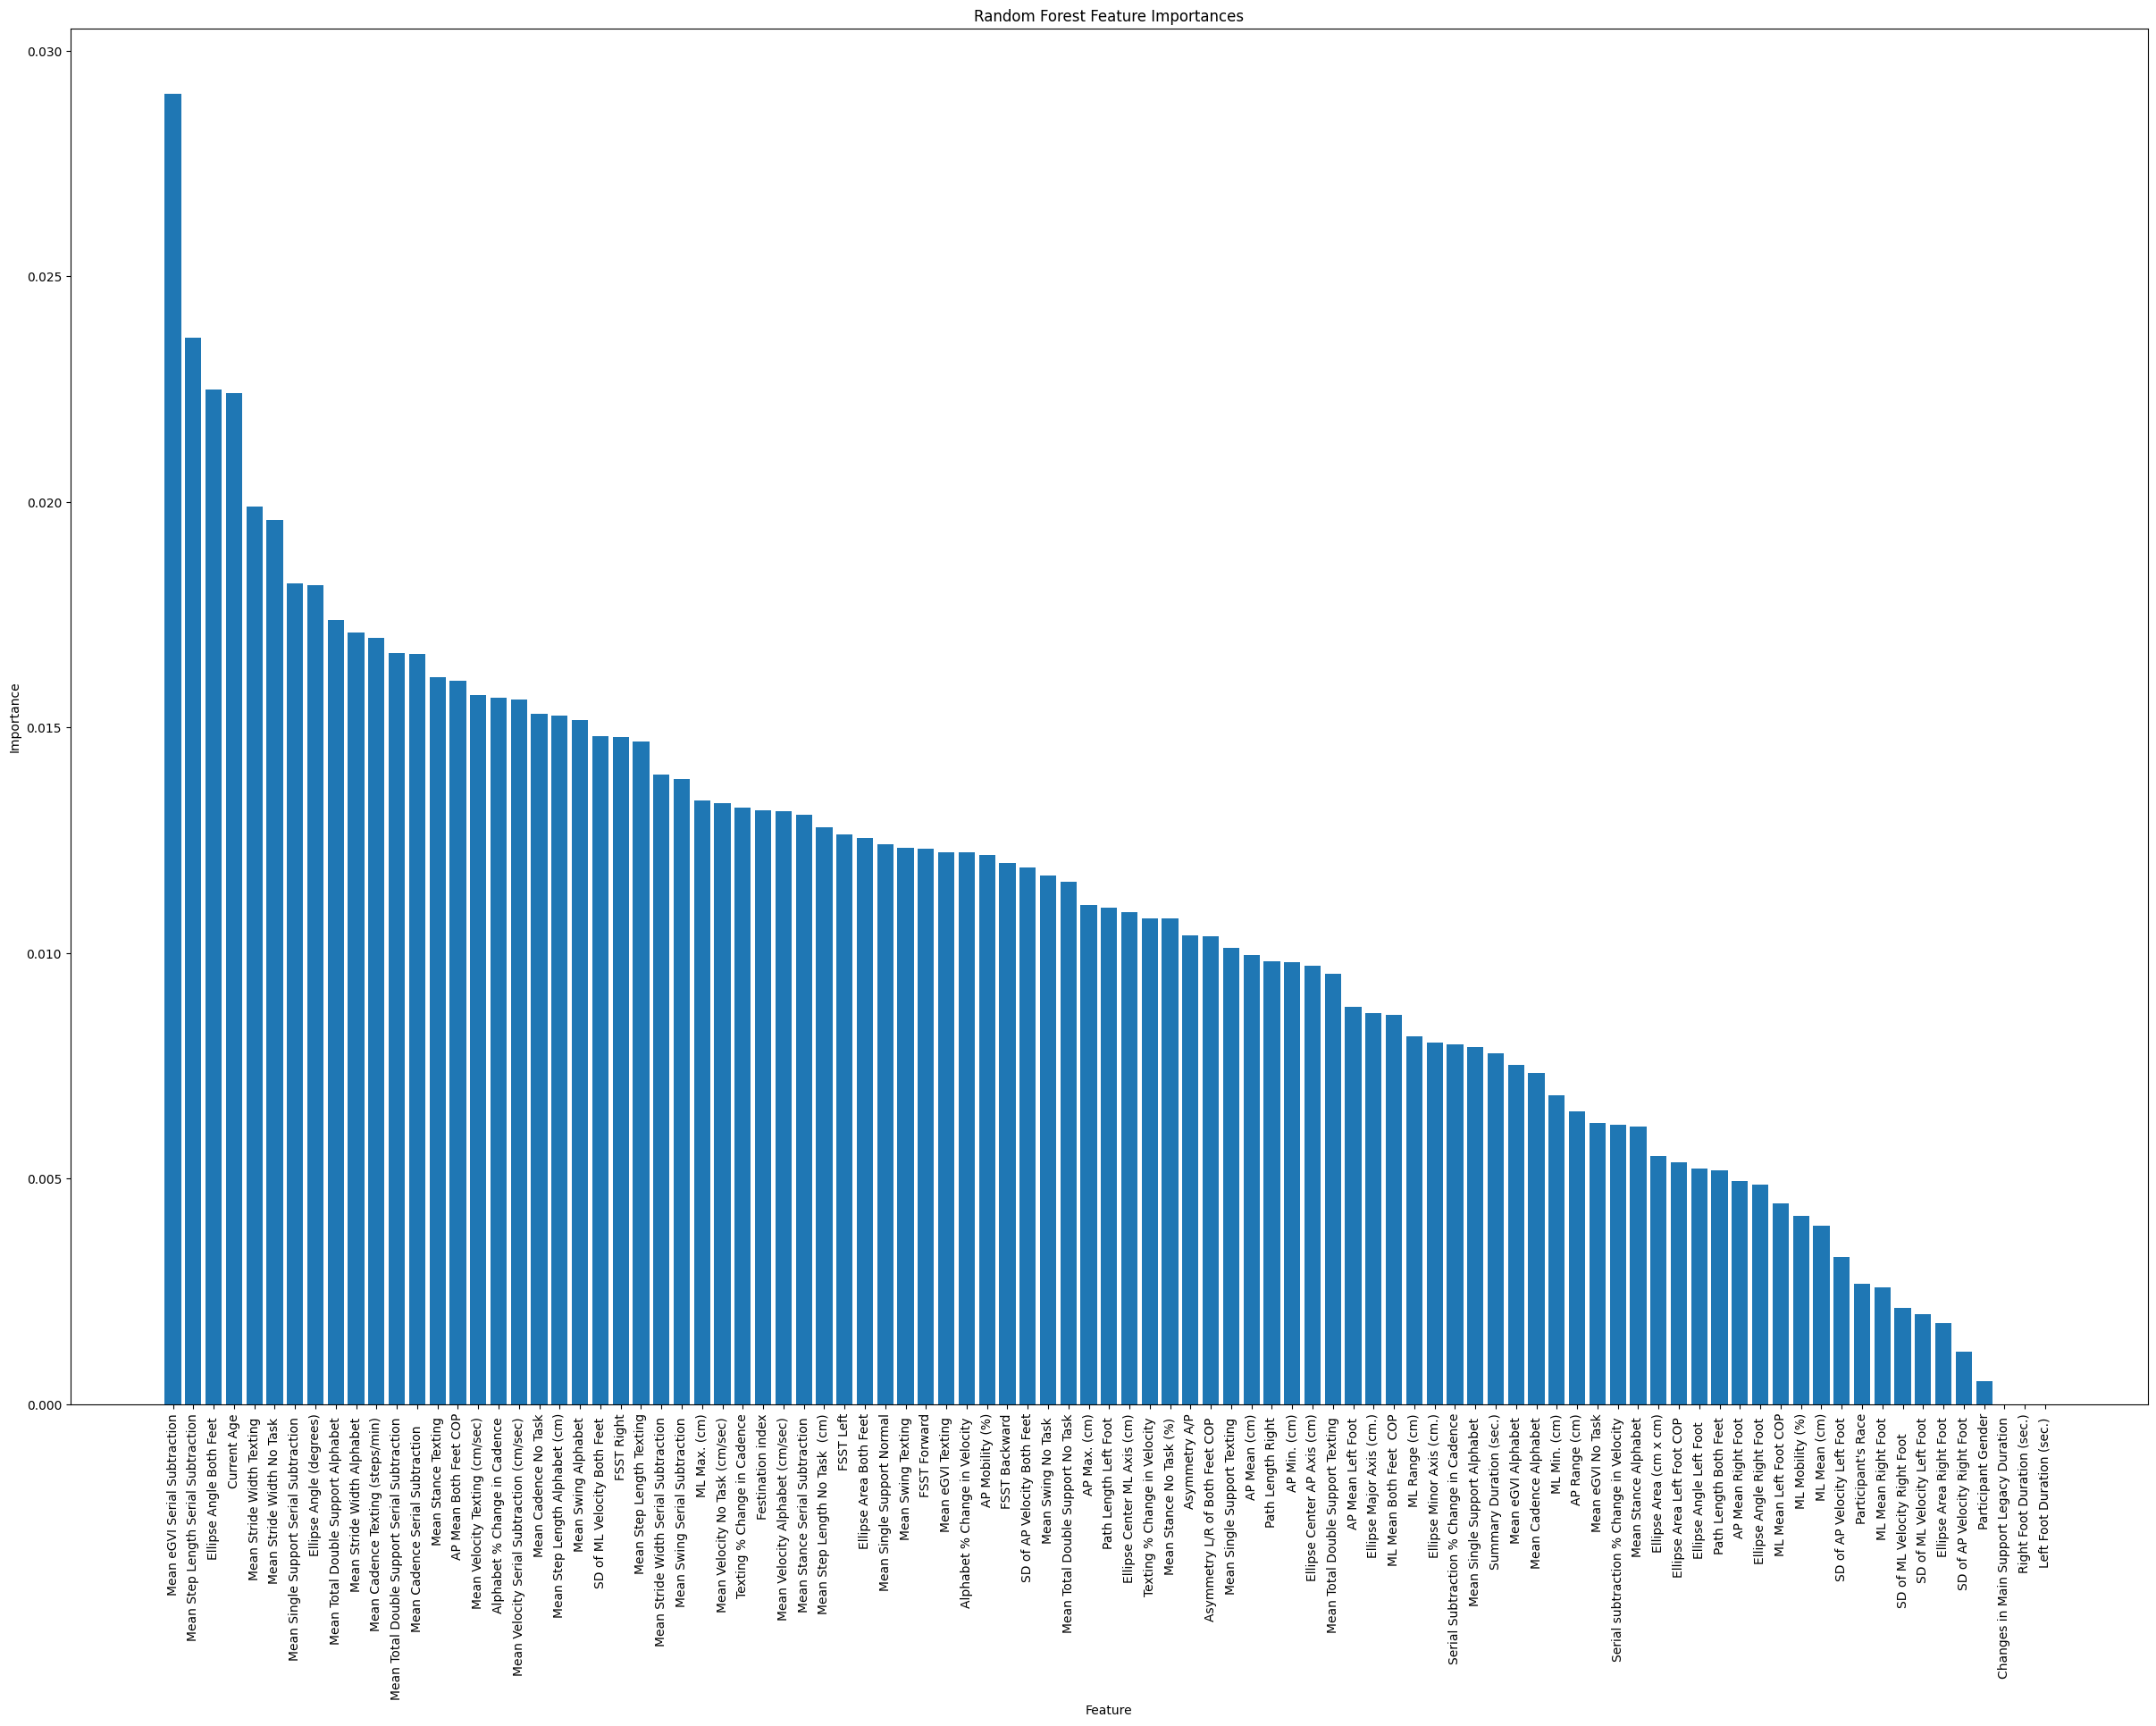

In [18]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Assuming you have a DataFrame df with features (X) and target variable (y)
# X is the feature matrix, and y is the target variable

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df3.drop('Diagnosis', axis=1), df3['Diagnosis'], test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Access feature importances
feature_importances = rf_classifier.feature_importances_

# Get the names of the features
feature_names = X_train.columns

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(30, 20))
plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Random Forest Feature Importances")
plt.savefig('featimp.pdf')
plt.show()
#plt.savefig('features.pdf')

In [19]:
n = df.nunique(axis=0)
n

Mean Velocity No Task (cm/sec)                154
Mean Velocity Alphabet (cm/sec)               148
Mean Cadence Serial Subtraction               145
Mean Velocity Serial Subtraction (cm/sec)     148
Mean Cadence Texting (steps/min)              140
                                             ... 
If MCI, please select                           5
Participant Gender                              2
Current Age                                    41
Participant's Race                              4
Diagnosis                                       3
Length: 98, dtype: int64

## Neural Network

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd


# Separate features (X) and target variable (y)

X = df3.drop('Diagnosis', axis=1).values
y = df3['Diagnosis'].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Create DataLoader for training and testing sets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Define the neural network model
class SimpleNN(nn.Module):
    def __init__(self, input_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

# Instantiate the model
model = SimpleNN(input_size=X_train.shape[1])

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 1000
for epoch in range(num_epochs):
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), targets)
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    y_pred_tensor = model(X_test_tensor)
y_pred = y_pred_tensor.numpy()

# Calculate Mean Squared Error on the test set
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse}")


Epoch [10/1000], Loss: 0.0845
Epoch [20/1000], Loss: 0.0375
Epoch [30/1000], Loss: 0.0655
Epoch [40/1000], Loss: 0.0121
Epoch [50/1000], Loss: 0.0006
Epoch [60/1000], Loss: 0.0002
Epoch [70/1000], Loss: 0.0643
Epoch [80/1000], Loss: 0.0039
Epoch [90/1000], Loss: 0.0001
Epoch [100/1000], Loss: 0.0000
Epoch [110/1000], Loss: 0.0000
Epoch [120/1000], Loss: 0.0001
Epoch [130/1000], Loss: 0.0005
Epoch [140/1000], Loss: 0.0012
Epoch [150/1000], Loss: 0.0071
Epoch [160/1000], Loss: 0.0019
Epoch [170/1000], Loss: 0.0027
Epoch [180/1000], Loss: 0.0005
Epoch [190/1000], Loss: 0.0008
Epoch [200/1000], Loss: 0.0000
Epoch [210/1000], Loss: 0.0001
Epoch [220/1000], Loss: 0.0000
Epoch [230/1000], Loss: 0.0001
Epoch [240/1000], Loss: 0.0003
Epoch [250/1000], Loss: 0.0003
Epoch [260/1000], Loss: 0.0030
Epoch [270/1000], Loss: 0.0008
Epoch [280/1000], Loss: 0.0008
Epoch [290/1000], Loss: 0.0025
Epoch [300/1000], Loss: 0.0011
Epoch [310/1000], Loss: 0.0029
Epoch [320/1000], Loss: 0.0029
Epoch [330/1000],

## Random Forest Regressor

In [21]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute NaN values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Define the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_imputed, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test_imputed)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse}")


Mean Squared Error on Test Set: 0.15656206896551725


## K-Fold cross-validation: Neural Network Model

In [24]:
kf = StratifiedKFold(n_splits=5, shuffle=True)

cv_scores = []

for k, (train_index, test_index) in enumerate(kf.split(X,y)):
    print('..workkng on iteration:', k)
    print('Train:', train_index, 'Test:', test_index)
    print('perform model training (.fit(..)), and testing here')
    print()
    X_train = X[train_index]
    X_test = X[test_index]
    y_train = y[train_index]
    y_test = y[test_index]

    # Evaluate the model on the test set
    model.eval()
    with torch.no_grad():
        y_pred_tensor = model(X_test_tensor)
    y_pred = y_pred_tensor.numpy()

# Calculate Mean Squared Error on the test set
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error on Test Set: {mse}")
    
    #print("%s: %.df%%", (model.metrics_names[1], scores[1]))

print("%.2f%% (+/- %.2f%%)" % (np.mean(cv_scores), np.std(cv_scores)))

..workkng on iteration: 0
Train: [  0   1   2   3   4   5   6   7   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  25  26  27  28  29  30  33  35  36  37  38  39  40
  41  42  43  44  45  46  48  49  50  51  52  54  55  56  57  59  61  63
  64  65  66  67  68  69  70  73  74  75  76  77  78  80  82  83  84  85
  86  88  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105
 107 108 109 110 112 113 114 115 117 119 120 121 122 124 125 126 128 129
 130 131 134 136 141 142 143 144] Test: [  8  24  31  32  34  47  53  58  60  62  71  72  79  81  87  89 106 111
 116 118 123 127 132 133 135 137 138 139 140]
perform model training (.fit(..)), and testing here

Mean Squared Error on Test Set: 0.9223929490036401
..workkng on iteration: 1
Train: [  0   1   2   4   5   6   7   8  10  11  12  14  15  18  19  21  24  25
  26  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44
  45  46  47  52  53  56  58  59  60  61  62  63  65  66  67  68  69  70
  71  72  74  

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encounte

## K-Fold cross-validation: Random Forest Regressor

In [ ]:
param_grid = {
    'max_depth': [5,10,20],
    'max_features' : [5,10,20],
    'n_estimators': [20,50]}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=0), 
param_grid=param_grid,cv=KFold(n_splits=5, shuffle=True, random_state=42))


grid_search.fit(X_train_tensor, y_train_tensor)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [5, 10, 20], 'max_features': [5, 10, 20],
                         'n_estimators': [20, 50]})

In [ ]:
n_scores = cross_val_score(rf_model, X_train_tensor, y_train_tensor,
                           cv=KFold(n_splits=5, shuffle=True, random_state=1)).mean()
grid_search.predict(X_test_tensor)

array([1.49908025, 1.21250633, 1.52058702, 1.53267513, 1.49860907,
       1.48313586, 1.07794801, 1.26699736, 1.31756446, 1.63040981,
       1.26322199, 1.56066849, 1.33477723, 1.52090793, 1.29831549,
       1.25954162, 1.42705901, 1.43240765, 1.40563592, 1.118618  ,
       1.47108007, 1.71368592, 1.4535214 , 1.18610395, 1.27856209,
       1.35908256, 1.18458696, 1.84070386, 1.47874852])

In [ ]:
grid_search.best_score_

-0.3278207879695151

In [ ]:
grid_search.score(X_test_tensor, y_test_tensor)

0.11137060673750876